In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('Clean_Amazon_Earbuds.csv')
data.drop(data.columns[0],inplace=True,axis=1)
data

,Titles,Brands,Prices,Stars,Ratings,Review_Words
0,JLab Audio JBuds Air Sport True Wireless Bluet...,JLAB,69.00,4.1,1815.0,"['sound quality', 'battery life', 'stopped wor..."
1,Panasonic RPHV21R In-Ear Earbud Heaphones with...,Panasonic,17.60,3.8,37.0,"['earbuds', 'big for my ears', 'another pair',..."
2,Jabra BT2050 Bluetooth Headset (Black),Jabra,NaN,4.2,27.0,"['ear', 'bluetooth', 'headset', 'verizon', 'ea..."
3,Panasonic Canal Type Earphone High Resolution ...,Panasonic,NaN,4.7,25.0,['No Review']
4,Sony ECM-TL3 Earphone-Style Mini Electret Cond...,Sony,17.99,4.2,215.0,"['sound quality', 'crystal clear', 'sides of t..."
...,...,...,...,...,...,...
1425,Sony MDR-EX450-W Earphones with Aluminium Hous...,Sony,86.27,4.2,97.0,['No Review']
1426,Koss KEB4 Portable Earbud (Black) (Discontinue...,Koss,NaN,3.9,17.0,['No Review']
1427,Samsung Galaxy Buds (2019) SM-R170 Bluetooth E...,SAMSUNG,91.41,4.5,2594.0,"['battery life', 'sound quality', 'stopped wor..."
1428,1-Pack Panasonic RP-HV096 Black Stereo Earphones,Panasonic,95.05,NaN,0.0,['No Review']


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430 entries, 0 to 1429
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Titles        1430 non-null   object 
 1   Brands        1430 non-null   object 
 2   Prices        964 non-null    float64
 3   Stars         1247 non-null   float64
 4   Ratings       1430 non-null   float64
 5   Review_Words  1430 non-null   object 
dtypes: float64(3), object(3)
memory usage: 67.2+ KB


In [4]:
data.describe()

,Prices,Stars,Ratings
count,964.000000,1247.000000,1430.000000
mean,62.108651,3.833039,412.985315
std,83.764529,0.610159,2443.118189
min,3.690000,1.000000,0.000000
25%,17.497500,3.500000,5.000000
50%,30.800000,3.900000,39.500000
75%,70.147500,4.200000,197.750000
max,998.000000,5.000000,83575.000000


In [5]:
data

,Titles,Brands,Prices,Stars,Ratings,Review_Words
0,JLab Audio JBuds Air Sport True Wireless Bluet...,JLAB,69.00,4.1,1815.0,"['sound quality', 'battery life', 'stopped wor..."
1,Panasonic RPHV21R In-Ear Earbud Heaphones with...,Panasonic,17.60,3.8,37.0,"['earbuds', 'big for my ears', 'another pair',..."
2,Jabra BT2050 Bluetooth Headset (Black),Jabra,NaN,4.2,27.0,"['ear', 'bluetooth', 'headset', 'verizon', 'ea..."
3,Panasonic Canal Type Earphone High Resolution ...,Panasonic,NaN,4.7,25.0,['No Review']
4,Sony ECM-TL3 Earphone-Style Mini Electret Cond...,Sony,17.99,4.2,215.0,"['sound quality', 'crystal clear', 'sides of t..."
...,...,...,...,...,...,...
1425,Sony MDR-EX450-W Earphones with Aluminium Hous...,Sony,86.27,4.2,97.0,['No Review']
1426,Koss KEB4 Portable Earbud (Black) (Discontinue...,Koss,NaN,3.9,17.0,['No Review']
1427,Samsung Galaxy Buds (2019) SM-R170 Bluetooth E...,SAMSUNG,91.41,4.5,2594.0,"['battery life', 'sound quality', 'stopped wor..."
1428,1-Pack Panasonic RP-HV096 Black Stereo Earphones,Panasonic,95.05,NaN,0.0,['No Review']


### 不同商家的星級排名
所有商家的星級平均值為3.83<br>
商家星級的std為0.22<br>
透過柱狀圖來看，我們更可以明顯看出各個商家的星級其實都沒有太大的區別<br>
但是，我們可以透過std來得出三個區間，各自為75%以上、中間、和25%以下的商家<br>
可以得出 Beats,SAMSUNG,Skullcandy,Sennheiser Consumer Audio,Amazon Renewed 為上段區間<br>
而且值得提出的事Beats的平均星級比平均高出了0.7快一顆星(值得後續去探討其原因)<br>
再來就是 Shure,JLAB,Sony,JVC,Pioneer,JBL,Panasonic,Monster,Audio-Technica為中段區間<br>
最後，Bang & Olufsen,PHILIPS,Plantronics,Koss,Jabra 為末段區間 (可以去研究一下為什麼他們比較不好)<br>

In [6]:
brands_avg_stars = data.groupby('Brands').Stars.mean().sort_values(ascending=False)
brands_avg_stars

Brands
Beats                        4.506250
SAMSUNG                      4.130769
Skullcandy                   4.007778
Sennheiser Consumer Audio    3.927586
Amazon Renewed               3.916418
Shure                        3.860000
JLAB                         3.848485
Sony                         3.840000
JVC                          3.836471
Pioneer                      3.822222
JBL                          3.819149
Panasonic                    3.801020
Monster                      3.782353
Audio-Technica               3.778205
Bang & Olufsen               3.761111
PHILIPS                      3.704615
Plantronics                  3.692857
Koss                         3.528302
Jabra                        3.500000
Name: Stars, dtype: float64

In [45]:
brands_std_stars = brands_avg_stars.std()
brands_std_stars

0.21581719089279713

In [46]:
[brands_avg_stars.quantile(i) for i in [0.25,0.75]]

[3.7696581196581205, 3.888208955223881]

In [49]:
#barlist[0].set_color('r')
up=[]
mid=[]
low=[]
for index,value in brands_avg_stars.items():
    if value > 3.888208955223881:
        up.append(index)
    elif value < 3.7696581196581205:
        low.append(index)
    else:
        mid.append(index)
print(up)
print(mid)
print(low)

['Beats', 'SAMSUNG', 'Skullcandy', 'Sennheiser Consumer Audio', 'Amazon Renewed']
['Shure', 'JLAB', 'Sony', 'JVC', 'Pioneer', 'JBL', 'Panasonic', 'Monster', 'Audio-Technica']
['Bang & Olufsen', 'PHILIPS', 'Plantronics', 'Koss', 'Jabra']


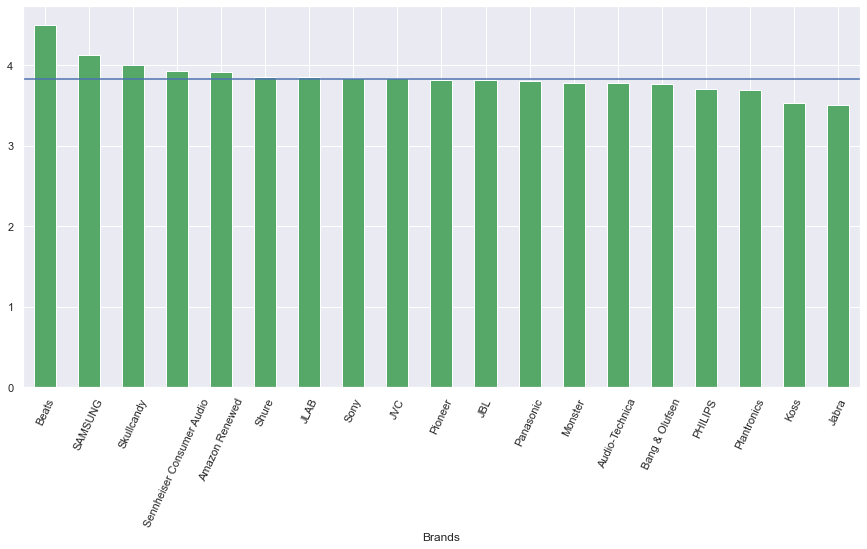

In [53]:
brands_avg_stars.plot(kind="bar", color='g',figsize=(15,7))
plt.xticks(rotation=65)
plt.axhline(data['Stars'].mean())

In [9]:
brands_avg_stars[0]-data['Stars'].mean()

0.6732107056936645

### 不同商家的平均評論數排名 
有些商家產品較多，所以評論數加總也會較多(會有失平衡)<br>
所以決定用商家的平均每個產品有多少評論來做分析數據<br>
mean = 423<br>
認為至少每個產品要有100個評論才算是有可信度<br>
可以看出Koss跟Pioneer的星級評分可能就沒那麼可信<br>
而且koss在評論數少的情況下，還得到較低星級，可能真的沒有很好<br>

In [71]:
brands_sum_ratings = data.groupby('Brands').Ratings.sum().sort_values(ascending=False)
brands_sum_ratings

Brands
Skullcandy                   111355.0
Panasonic                    108273.0
Sony                          87447.0
JVC                           46951.0
SAMSUNG                       39018.0
PHILIPS                       29381.0
JBL                           25518.0
Sennheiser Consumer Audio     24611.0
Jabra                         23988.0
JLAB                          23279.0
Amazon Renewed                13148.0
Shure                         10374.0
Bang & Olufsen                 9456.0
Audio-Technica                 8767.0
Beats                          8403.0
Plantronics                    7363.0
Monster                        6631.0
Koss                           5363.0
Pioneer                        1243.0
Name: Ratings, dtype: float64

In [83]:
#商家總評論數/商家商品數 = 平均每個產品有多少評論
brands_products = data.groupby('Brands').Titles.count().sort_values(ascending=False)
brands_ratings_perproduct = (brands_sum_ratings/ brands_products).sort_values(ascending=False)
brands_ratings_perproduct

Brands
Skullcandy                   1184.627660
Panasonic                     925.410256
Sennheiser Consumer Audio     793.903226
JLAB                          705.424242
Jabra                         631.263158
SAMSUNG                       609.656250
Beats                         494.294118
PHILIPS                       432.073529
Sony                          412.485849
Bang & Olufsen                378.240000
JBL                           263.072165
Plantronics                   253.896552
Shure                         230.533333
JVC                           211.490991
Amazon Renewed                168.564103
Monster                       125.113208
Audio-Technica                101.941860
Koss                           58.934066
Pioneer                        41.433333
dtype: float64

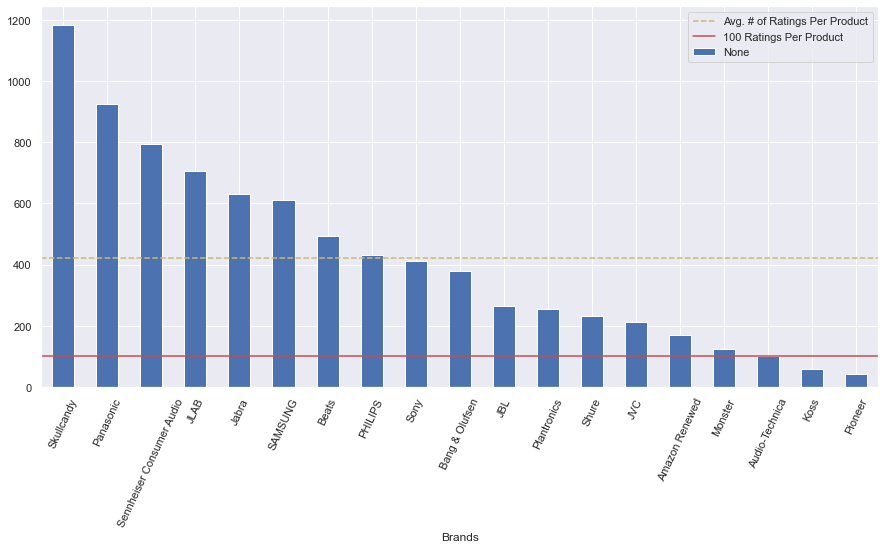

In [93]:
brands_ratings_perproduct.plot(kind="bar", color='b',figsize=(15,7))
plt.xticks(rotation=65)
plt.axhline(brands_ratings_perproduct.mean(), label='Avg. # of Ratings Per Product',color='y',linestyle='--')
plt.axhline(100, label='100 Ratings Per Product',color='r')
plt.legend()

### 不同商家的價格
耳機的平均市場價格為:79.44<br>
可以看出來各個港商都有各自想瞄準的族群<br>
市場平均價其實是被少數廠商所拉高的<br>
低市場價格實為: 38.1<br>
高市場價格實為: 93.56<br>
高端市場 : Bang & Olufsen,Shure,Beats,Sennheiser Consumer Audio,Audio-Technica<br>
    &ensp; &ensp; &ensp; &ensp; 依照星級評分：Beats,Sennheiser Consumer Audio,Shure,Audio-Technia,Bang & Olufsen<br>
中端市場: Jabra,Sony,Plantronics,Amazon Renewed,SAMSUNG,JBL,JVC,Pioneer,Panasonic<br>
    &ensp; &ensp; &ensp; &ensp;    依照星級評分：SAMSUNG,Amazon Renewed,Sony,JVC,Pioneer,JBL,Panasonic,Plantronics,Jabra<br>
低端市場: Skullcandy,Monster,JLAB,Koss,PHILIPS<br>
    &ensp; &ensp; &ensp; &ensp;    依照星級評分：Skullcandy,JLAB,Monster,PHILIPS,Koss

In [98]:
price_max = data.groupby('Brands').Prices.max()
price_mean = data.groupby('Brands').Prices.mean()
price_min = data.groupby('Brands').Prices.min()
price_interval = pd.concat([price_max,price_mean,price_min],axis=1)
price_interval.columns = ['Max Price','Avg. Price','Min Price']
price_interval

,Max Price,Avg. Price,Min Price
Brands,,,
Amazon Renewed,429.99,57.530469,7.49
Audio-Technica,750.00,96.586429,14.95
Bang & Olufsen,475.00,221.658571,24.00
Beats,228.95,166.595625,57.99
JBL,161.99,55.026212,12.95
JLAB,89.99,29.761905,9.88
JVC,679.77,44.537251,4.69
Jabra,252.91,90.548077,7.77
Koss,110.36,24.011270,6.48


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Bang & Olufsen'),
  Text(1, 0, 'Shure'),
  Text(2, 0, 'Beats'),
  Text(3, 0, 'Sennheiser Consumer Audio'),
  Text(4, 0, 'Audio-Technica'),
  Text(5, 0, 'Jabra'),
  Text(6, 0, 'Sony'),
  Text(7, 0, 'Plantronics'),
  Text(8, 0, 'Amazon Renewed'),
  Text(9, 0, 'SAMSUNG'),
  Text(10, 0, 'JBL'),
  Text(11, 0, 'JVC'),
  Text(12, 0, 'Pioneer'),
  Text(13, 0, 'Panasonic'),
  Text(14, 0, 'Skullcandy'),
  Text(15, 0, 'Monster'),
  Text(16, 0, 'JLAB'),
  Text(17, 0, 'Koss'),
  Text(18, 0, 'PHILIPS')])

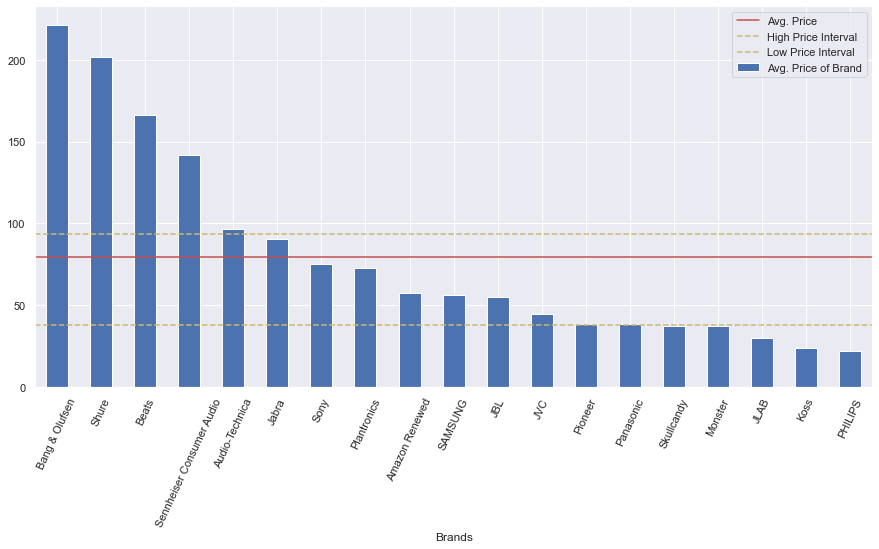

In [160]:
price_mean_plot = price_interval['Avg. Price'].sort_values(ascending=False)
price_mean_plot.plot.bar(figsize=(15,7),label = 'Avg. Price of Brand')
plt.axhline(price_mean.mean(), label='Avg. Price',color='r')
plt.axhline(93.56725274725272, label='High Price Interval',color='y',linestyle='--')
plt.axhline(38.1, label='Low Price Interval',color='y',linestyle='--')
plt.legend()
plt.xticks(rotation=65)

In [15]:
price_mean.mean()

79.44106999865006

In [96]:
price_interval = [price_mean.quantile(i) for i in [0.25,0.75]]
price_interval

[38.104023076923085, 93.56725274725272]

In [103]:
interval_price = price_interval['Avg. Price'].sort_values(ascending=False)
high = []
mid = []
low = []
for index,price in interval_price.items():
    if price > interval_price.quantile(0.75):
        high.append(index)
    elif price < interval_price.quantile(0.25):
        low.append(index)
    else:
        mid.append(index)
print(high)
print(mid)
print(low)

['Bang & Olufsen', 'Shure', 'Beats', 'Sennheiser Consumer Audio', 'Audio-Technica']
['Jabra', 'Sony', 'Plantronics', 'Amazon Renewed', 'SAMSUNG', 'JBL', 'JVC', 'Pioneer', 'Panasonic']
['Skullcandy', 'Monster', 'JLAB', 'Koss', 'PHILIPS']


In [112]:
print(brands_avg_stars[high].sort_values(ascending=False).index)
print(brands_avg_stars[mid].sort_values(ascending=False).index)
print(brands_avg_stars[low].sort_values(ascending=False).index)

Index(['Beats', 'Sennheiser Consumer Audio', 'Shure', 'Audio-Technica',
       'Bang & Olufsen'],
      dtype='object', name='Brands')
Index(['SAMSUNG', 'Amazon Renewed', 'Sony', 'JVC', 'Pioneer', 'JBL',
       'Panasonic', 'Plantronics', 'Jabra'],
      dtype='object', name='Brands')
Index(['Skullcandy', 'JLAB', 'Monster', 'PHILIPS', 'Koss'], dtype='object', name='Brands')


### 市占率
Amazon的Ratings是需要經過購買才能填的，因此推斷ratings的數量銷售量成正比<br>
結果顯示SkullCandy的薄利多銷還挺成功的<br>
並且可以看出市占率高的基本上都是中低價位<br>
更是可以發現高價位的廠商們只佔了10%的市場

In [158]:
sales_count = data.groupby('Brands').Ratings.sum().sort_values(ascending=False)
sales_count_percentage =sales_count/(sales_count.sum())

<AxesSubplot:xlabel='Brands'>

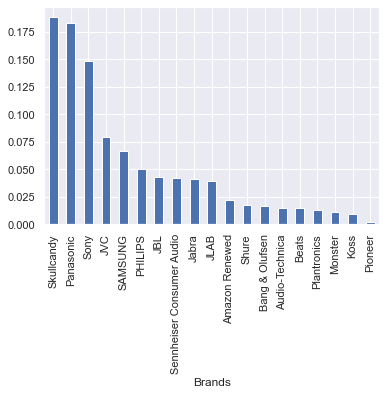

In [165]:
sales_count_percentage.plot.bar()

In [169]:
sales_count_percentage[high].sum()

0.10432481217266738

### 商家的商品數量圓形圖

In [17]:
item_count = data.groupby('Brands').Titles.count().sort_values()
item_count

Brands
Beats                         17
Bang & Olufsen                25
Plantronics                   29
Pioneer                       30
Sennheiser Consumer Audio     31
JLAB                          33
Jabra                         38
Shure                         45
Monster                       53
SAMSUNG                       64
PHILIPS                       68
Amazon Renewed                78
Audio-Technica                86
Koss                          91
Skullcandy                    94
JBL                           97
Panasonic                    117
Sony                         212
JVC                          222
Name: Titles, dtype: int64

In [18]:
item_count.index

Index(['Beats', 'Bang & Olufsen', 'Plantronics', 'Pioneer',
       'Sennheiser Consumer Audio', 'JLAB', 'Jabra', 'Shure', 'Monster',
       'SAMSUNG', 'PHILIPS', 'Amazon Renewed', 'Audio-Technica', 'Koss',
       'Skullcandy', 'JBL', 'Panasonic', 'Sony', 'JVC'],
      dtype='object', name='Brands')

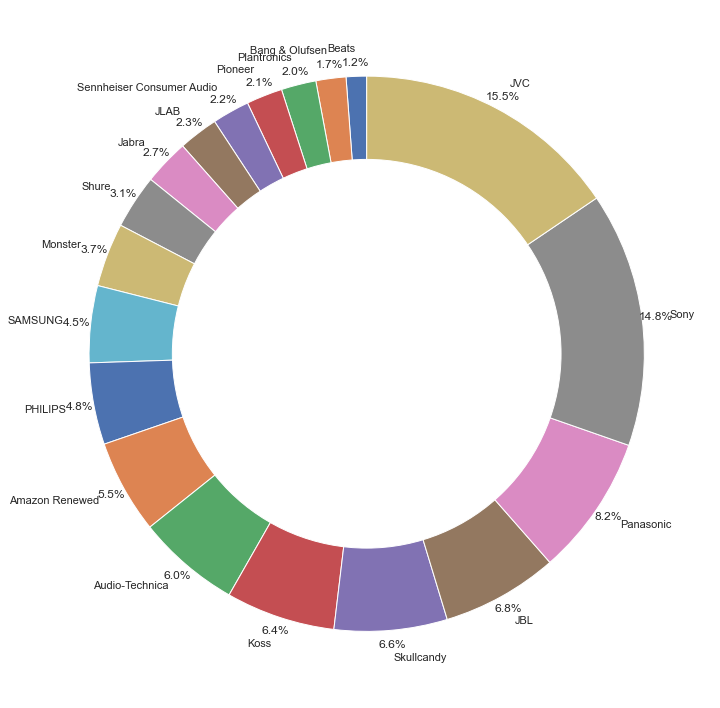

In [19]:
fig1, ax1 = plt.subplots(figsize=(30,10))
labels = item_count.index
ax1.pie(item_count,labels=labels, autopct='%1.1f%%',pctdistance=1.05,radius=1,
        shadow=False, startangle=90)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
#ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [20]:
sort_price[:6]

Brands
Bang & Olufsen               221.658571
Shure                        202.108333
Beats                        166.595625
Sennheiser Consumer Audio    142.073704
Audio-Technica                96.586429
Jabra                         90.548077
Name: Prices, dtype: float64

In [21]:
high_price_brands_counts = data.groupby('Brands').Titles.count().sort_values(ascending=False)
high_price_brands_percentage = high_price_brands_counts[sort_price[:3].index].sum()/1430
high_price_brands_percentage 

0.06083916083916084

可以看出其實高價位的廠商所推出的商品數量其實不多<br>
尤其是平均價格超過100元的前四家高端廠商，商品數加總起來只佔了6.1%的市場商品<br>
但是低價位的場數卻是主打薄利多銷

### 不同商家的加權分排名
有人買最重要 -> Ratings 越多越好 45%<br>
價格必定有影響 -> 30%<br>
從上面的分析可以看出Stars 有點vague 20% <br>
商品數量 -> 5% 

In [22]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
Nor = Normalizer(norm='l2')

In [23]:
Ratings = data.groupby('Brands').Ratings.sum()
Ratings

Brands
Amazon Renewed                13148.0
Audio-Technica                 8767.0
Bang & Olufsen                 9456.0
Beats                          8403.0
JBL                           25518.0
JLAB                          23279.0
JVC                           46951.0
Jabra                         23988.0
Koss                           5363.0
Monster                        6631.0
PHILIPS                       29381.0
Panasonic                    108273.0
Pioneer                        1243.0
Plantronics                    7363.0
SAMSUNG                       39018.0
Sennheiser Consumer Audio     24611.0
Shure                         10374.0
Skullcandy                   111355.0
Sony                          87447.0
Name: Ratings, dtype: float64

In [24]:
Prices = data.groupby('Brands').Prices.mean()
Prices

Brands
Amazon Renewed                57.530469
Audio-Technica                96.586429
Bang & Olufsen               221.658571
Beats                        166.595625
JBL                           55.026212
JLAB                          29.761905
JVC                           44.537251
Jabra                         90.548077
Koss                          24.011270
Monster                       37.370714
PHILIPS                       22.173273
Panasonic                     38.635846
Pioneer                       38.786818
Plantronics                   72.664286
SAMSUNG                       56.378750
Sennheiser Consumer Audio    142.073704
Shure                        202.108333
Skullcandy                    37.572200
Sony                          75.360597
Name: Prices, dtype: float64

In [25]:
Stars = data.groupby('Brands').Stars.mean()
Stars

Brands
Amazon Renewed               3.916418
Audio-Technica               3.778205
Bang & Olufsen               3.761111
Beats                        4.506250
JBL                          3.819149
JLAB                         3.848485
JVC                          3.836471
Jabra                        3.500000
Koss                         3.528302
Monster                      3.782353
PHILIPS                      3.704615
Panasonic                    3.801020
Pioneer                      3.822222
Plantronics                  3.692857
SAMSUNG                      4.130769
Sennheiser Consumer Audio    3.927586
Shure                        3.860000
Skullcandy                   4.007778
Sony                         3.840000
Name: Stars, dtype: float64

In [26]:
Items = data.groupby('Brands').Titles.count()
Items

Brands
Amazon Renewed                78
Audio-Technica                86
Bang & Olufsen                25
Beats                         17
JBL                           97
JLAB                          33
JVC                          222
Jabra                         38
Koss                          91
Monster                       53
PHILIPS                       68
Panasonic                    117
Pioneer                       30
Plantronics                   29
SAMSUNG                       64
Sennheiser Consumer Audio     31
Shure                         45
Skullcandy                    94
Sony                         212
Name: Titles, dtype: int64

In [27]:
score = pd.concat([Ratings,Prices,Stars,Items],axis=1)
print(score.shape)
score.sort_values('Ratings',ascending=False)

(19, 4)


,Ratings,Prices,Stars,Titles
Brands,,,,
Skullcandy,111355.0,37.572200,4.007778,94
Panasonic,108273.0,38.635846,3.801020,117
Sony,87447.0,75.360597,3.840000,212
JVC,46951.0,44.537251,3.836471,222
SAMSUNG,39018.0,56.378750,4.130769,64
PHILIPS,29381.0,22.173273,3.704615,68
JBL,25518.0,55.026212,3.819149,97
Sennheiser Consumer Audio,24611.0,142.073704,3.927586,31
Jabra,23988.0,90.548077,3.500000,38


In [28]:
print(SS.fit_transform(score).shape)
SS_score_df = SS.fit_transform(score)
SS_score_df

(19, 4)


array([[-0.53915516, -0.37243791,  0.3378338 ,  0.04870259],
       [-0.67085821,  0.29143799, -0.3201311 ,  0.19106401],
       [-0.65014527,  2.41742288, -0.40150753, -0.8944418 ],
       [-0.6818009 ,  1.48145913,  3.14574202, -1.03680322],
       [-0.16728419, -0.41500544, -0.12521723,  0.38681096],
       [-0.23459374, -0.84444987,  0.01443701, -0.75208039],
       [ 0.47704165, -0.59329751, -0.04275714,  2.61120811],
       [-0.21327955,  0.18879767, -1.64453254, -0.6631045 ],
       [-0.77319037, -0.94219956, -1.5098008 ,  0.28003989],
       [-0.73507134, -0.7151148 , -0.30038535, -0.39617684],
       [-0.05115342, -0.97344196, -0.67045664, -0.12924918],
       [ 2.32052361, -0.69361   , -0.21151847,  0.7427145 ],
       [-0.89704715, -0.69104377, -0.11058678, -0.80546592],
       [-0.71306572, -0.11519225, -0.726432  , -0.82326109],
       [ 0.23855722, -0.3920149 ,  1.35825782, -0.20042989],
       [-0.19455072,  1.06463382,  0.39100071, -0.78767074],
       [-0.62254805,  2.

In [29]:
SS_score_df = pd.DataFrame(SS_score_df,index=score.index,columns=score.columns).sort_values('Ratings',ascending=False)
SS_score_df['Sum'] = SS_score_df['Ratings'] +SS_score_df['Prices']+SS_score_df['Stars']+SS_score_df['Titles']
SS_score_df

,Ratings,Prices,Stars,Titles,Sum
Brands,,,,,
Skullcandy,2.413176,-0.711690,0.772754,0.333425,2.807666
Panasonic,2.320524,-0.693610,-0.211518,0.742715,2.158110
Sony,1.694446,-0.069360,-0.025955,2.433256,4.032386
JVC,0.477042,-0.593298,-0.042757,2.611208,2.452195
SAMSUNG,0.238557,-0.392015,1.358258,-0.200430,1.004370
PHILIPS,-0.051153,-0.973442,-0.670457,-0.129249,-1.824301
JBL,-0.167284,-0.415005,-0.125217,0.386811,-0.320696
Sennheiser Consumer Audio,-0.194551,1.064634,0.391001,-0.787671,0.473413
Jabra,-0.213280,0.188798,-1.644533,-0.663104,-2.332119


<AxesSubplot:xlabel='Brands'>

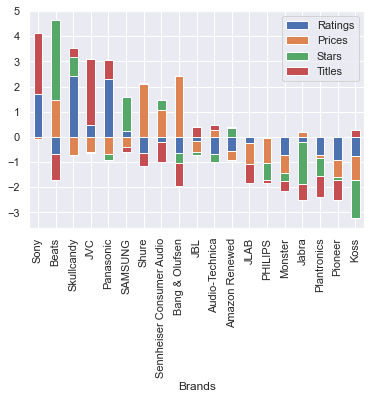

In [30]:
SS_score_df.sort_values('Sum',ascending=False).iloc[:,:-1].plot.bar(stacked=True)
## 沒有加權時可以讓我們看出各個廠商的優勢是什麼

In [31]:
SS_weighted_score = pd.DataFrame([SS_score_df['Ratings']*0.45,SS_score_df['Prices']*0.3,SS_score_df['Stars']*0.2,SS_score_df['Titles']])
SS_weighted_score = SS_weighted_score.T
SS_weighted_score['Weighted Score'] = SS_weighted_score['Ratings']-SS_weighted_score['Prices']+SS_weighted_score['Stars']+SS_weighted_score['Titles']
SS_weighted_score = SS_weighted_score.sort_values('Weighted Score',ascending=False)
SS_weighted_score

,Ratings,Prices,Stars,Titles,Weighted Score
Brands,,,,,
Sony,0.762501,-0.020808,-0.005191,2.433256,3.211374
JVC,0.214669,-0.177989,-0.008551,2.611208,2.995315
Panasonic,1.044236,-0.208083,-0.042304,0.742715,1.952729
Skullcandy,1.085929,-0.213507,0.154551,0.333425,1.787412
JBL,-0.075278,-0.124502,-0.025043,0.386811,0.410991
SAMSUNG,0.107351,-0.117604,0.271652,-0.200430,0.296177
PHILIPS,-0.023019,-0.292033,-0.134091,-0.129249,0.005673
Amazon Renewed,-0.242620,-0.111731,0.067567,0.048703,-0.014619
Koss,-0.347936,-0.282660,-0.301960,0.280040,-0.087196


<AxesSubplot:xlabel='Brands'>

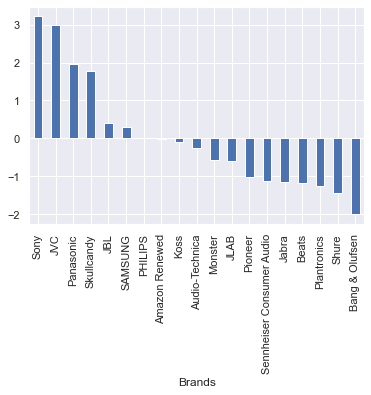

In [32]:
SS_weighted_score.iloc[:,4].plot.bar(stacked=True)

###  Word Cloud

In [33]:
data

,Titles,Brands,Prices,Stars,Ratings,Review_Words
0,JLab Audio JBuds Air Sport True Wireless Bluet...,JLAB,69.00,4.1,1815.0,"['sound quality', 'battery life', 'stopped wor..."
1,Panasonic RPHV21R In-Ear Earbud Heaphones with...,Panasonic,17.60,3.8,37.0,"['earbuds', 'big for my ears', 'another pair',..."
2,Jabra BT2050 Bluetooth Headset (Black),Jabra,NaN,4.2,27.0,"['ear', 'bluetooth', 'headset', 'verizon', 'ea..."
3,Panasonic Canal Type Earphone High Resolution ...,Panasonic,NaN,4.7,25.0,['No Review']
4,Sony ECM-TL3 Earphone-Style Mini Electret Cond...,Sony,17.99,4.2,215.0,"['sound quality', 'crystal clear', 'sides of t..."
...,...,...,...,...,...,...
1425,Sony MDR-EX450-W Earphones with Aluminium Hous...,Sony,86.27,4.2,97.0,['No Review']
1426,Koss KEB4 Portable Earbud (Black) (Discontinue...,Koss,NaN,3.9,17.0,['No Review']
1427,Samsung Galaxy Buds (2019) SM-R170 Bluetooth E...,SAMSUNG,91.41,4.5,2594.0,"['battery life', 'sound quality', 'stopped wor..."
1428,1-Pack Panasonic RP-HV096 Black Stereo Earphones,Panasonic,95.05,NaN,0.0,['No Review']


In [34]:
#發現type(Review_words)=String，所以先轉成list
import ast 

for index,strings in data['Review_Words'].items():
    data['Review_Words'][index] = ast.literal_eval(strings) 
data['Review_Words'][0]


<ipython-input-34-1dc202a01fe9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Review_Words'][index] = ast.literal_eval(strings)


['sound quality',
 'battery life',
 'stopped working',
 'earbud',
 'left earbud',
 'right earbud',
 'wireless earbuds',
 'true wireless',
 'stay in place',
 'left ear',
 'touch controls',
 'foam tips',
 'right ear',
 'great sound',
 'audio quality']

In [35]:
Words = []
for index,words in data['Review_Words'].items():
    for word in words:
        if word == 'No Review':
            continue
        else:
            Words.append(word)
Words

['sound quality',
 'battery life',
 'stopped working',
 'earbud',
 'left earbud',
 'right earbud',
 'wireless earbuds',
 'true wireless',
 'stay in place',
 'left ear',
 'touch controls',
 'foam tips',
 'right ear',
 'great sound',
 'audio quality',
 'earbuds',
 'big for my ears',
 'another pair',
 'great price',
 'sound quality',
 'earbuds',
 'headphones',
 'pink',
 'red',
 'value',
 'clip',
 'inexpensive',
 'uncomfortable',
 'comfortably',
 'expensive',
 'gym',
 'ipod',
 'pairs',
 'ear',
 'bluetooth',
 'headset',
 'verizon',
 'earpiece',
 'hear',
 'pairing',
 'samsung',
 'sound quality',
 'crystal clear',
 'sides of the conversation',
 'make sure',
 'works great',
 'cell phone',
 'take notes',
 'ear piece',
 'phone call',
 'mic jack',
 'works well',
 'works perfectly',
 'easy to use',
 'voice recorder',
 'battery life',
 'noise cancelling',
 'poor battery',
 'charging',
 'neck',
 'volume',
 'audio',
 'bluetooth',
 'buttons',
 'hrs',
 'dont',
 'loud',
 'mine',
 'paid',
 'battery life'

In [36]:
from collections import Counter
count = Counter(Words)
count

Counter({'sound quality': 558,
         'battery life': 238,
         'stopped working': 198,
         'earbud': 122,
         'left earbud': 39,
         'right earbud': 28,
         'wireless earbuds': 55,
         'true wireless': 31,
         'stay in place': 39,
         'left ear': 25,
         'touch controls': 25,
         'foam tips': 23,
         'right ear': 15,
         'great sound': 217,
         'audio quality': 16,
         'earbuds': 273,
         'big for my ears': 2,
         'another pair': 65,
         'great price': 26,
         'headphones': 166,
         'pink': 3,
         'red': 3,
         'value': 8,
         'clip': 8,
         'inexpensive': 2,
         'uncomfortable': 11,
         'comfortably': 2,
         'expensive': 6,
         'gym': 17,
         'ipod': 12,
         'pairs': 8,
         'ear': 76,
         'bluetooth': 46,
         'headset': 19,
         'verizon': 1,
         'earpiece': 7,
         'hear': 43,
         'pairing': 1,
         'sa

(-0.5, 9599.5, 9599.5, -0.5)

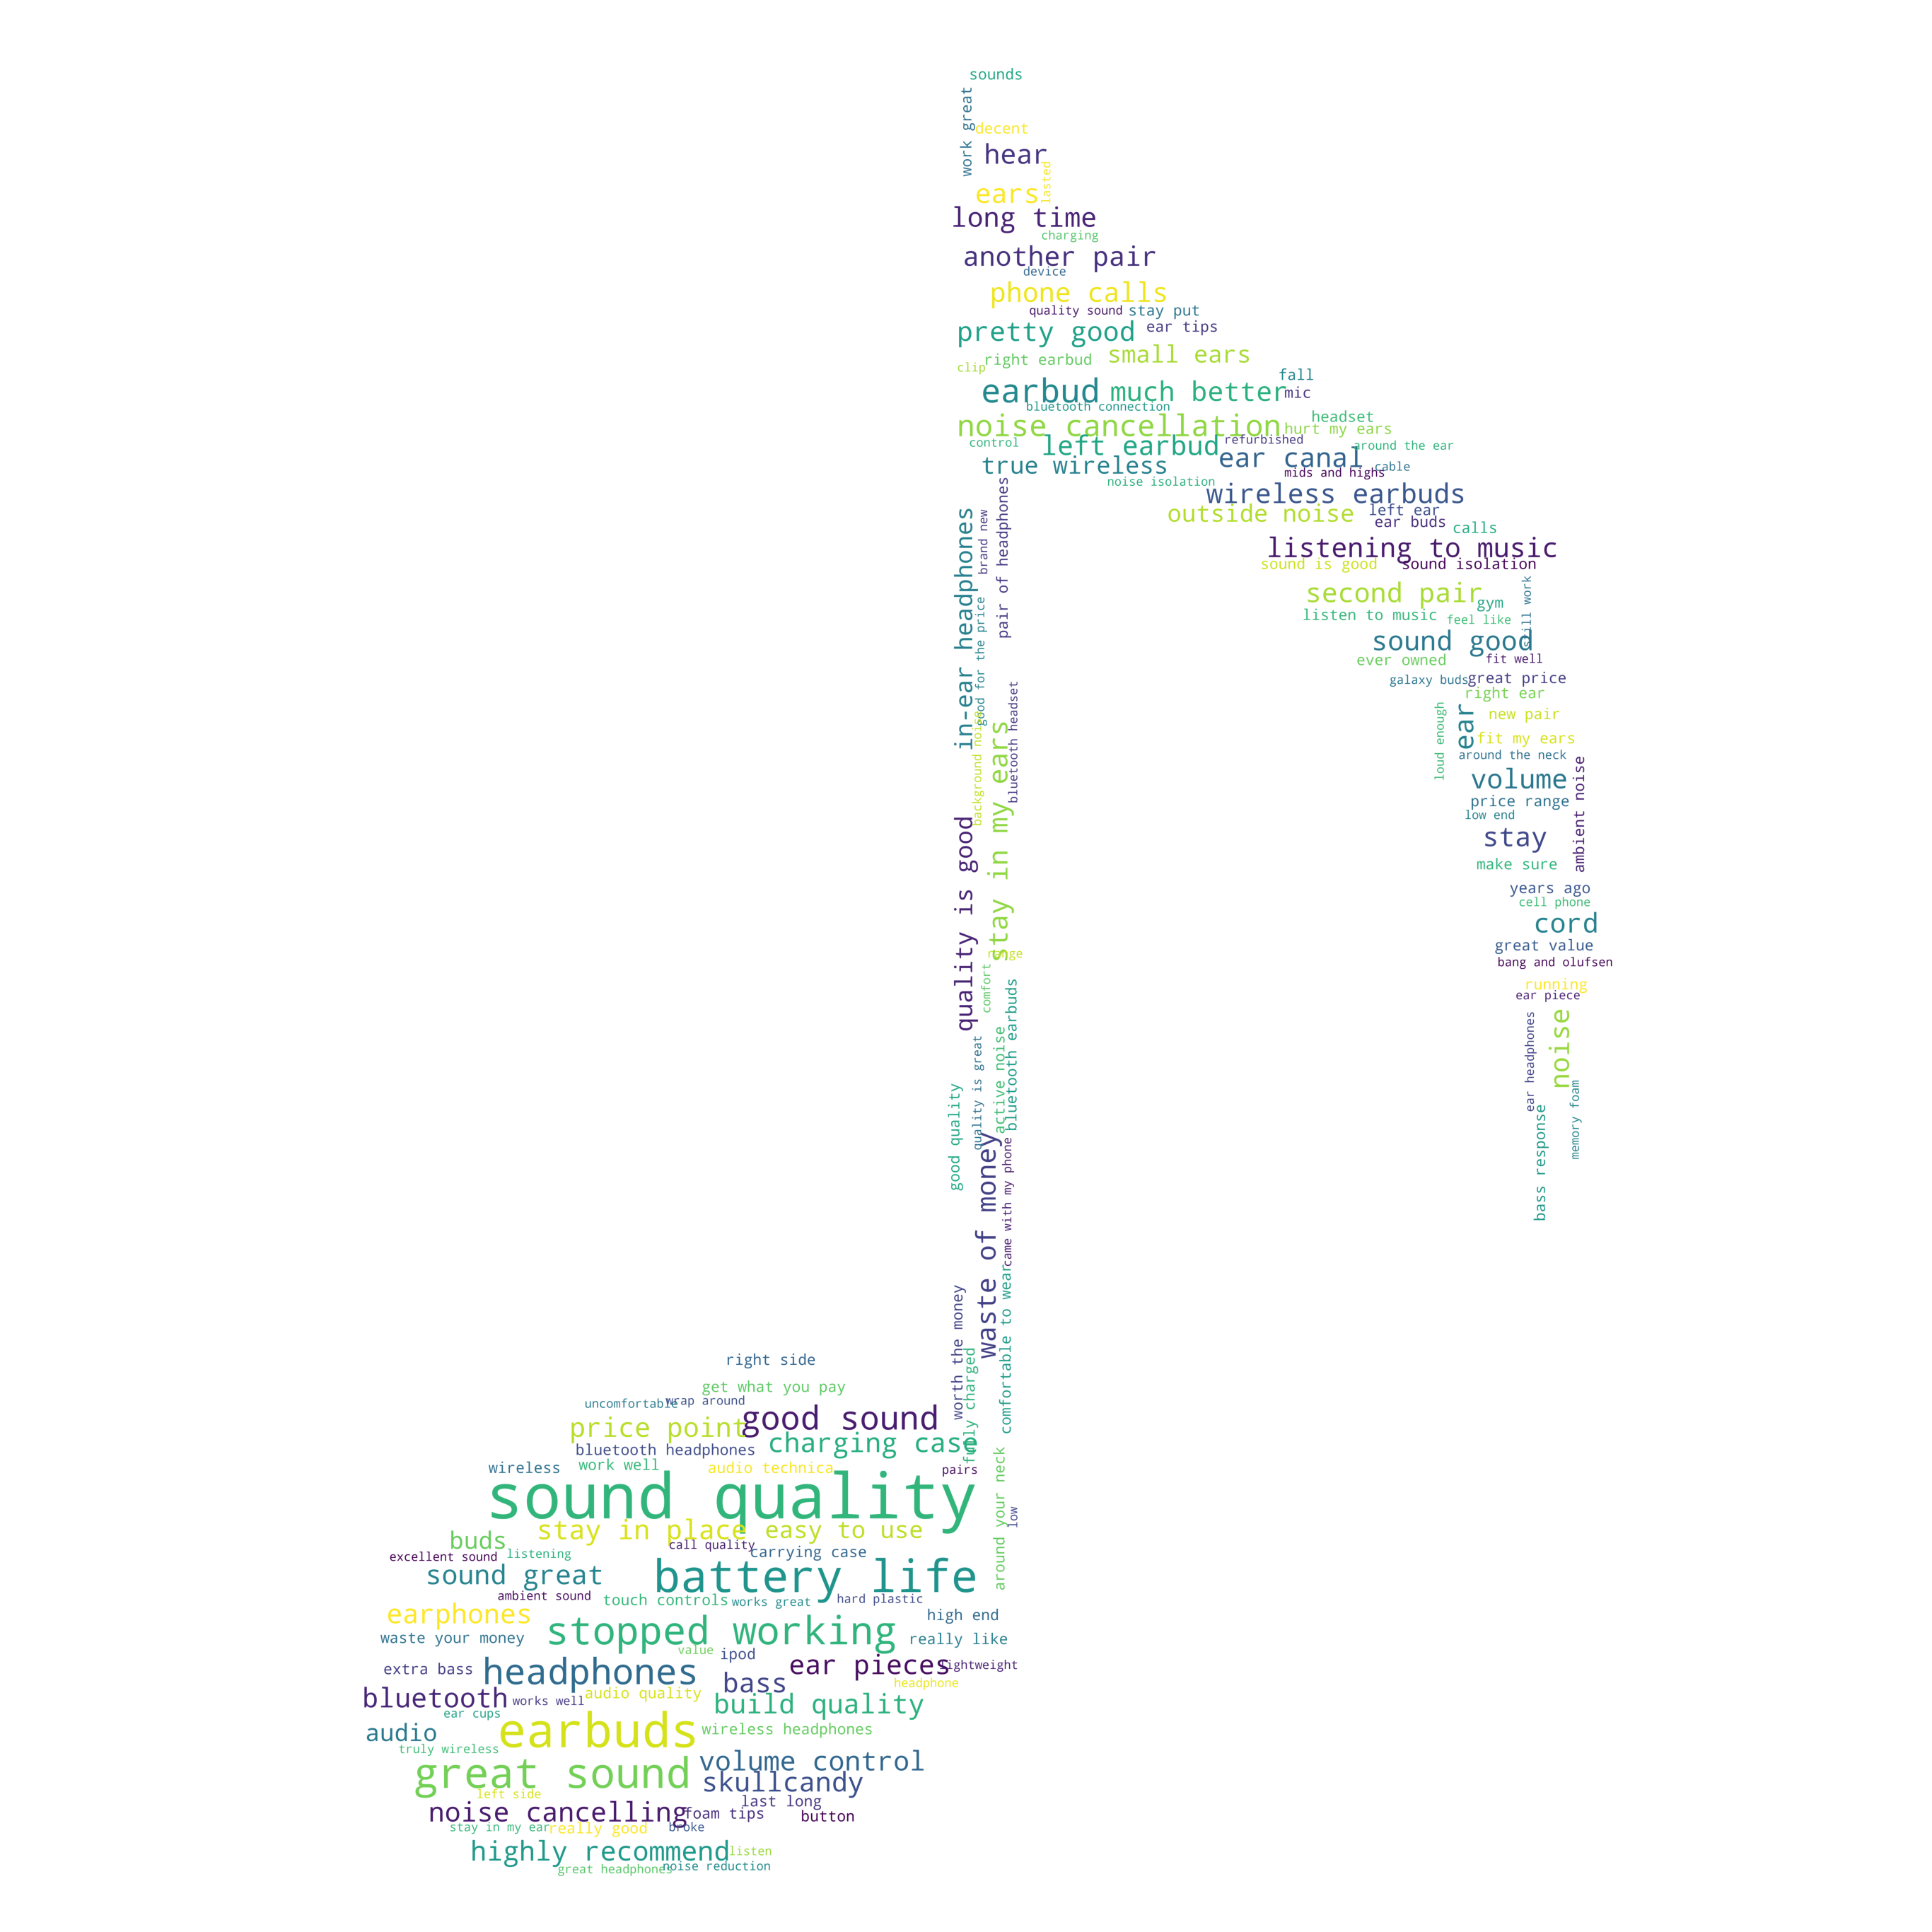

In [37]:
from PIL import Image
from wordcloud import WordCloud
mask = np.array(Image.open('mask1.jpg'))
wordcloud = WordCloud(mask=mask,background_color="white",contour_color='steelblue',scale=15)
wordcloud.generate_from_frequencies(frequencies=count)
plt.figure(figsize=(100,50))
plt.imshow(wordcloud)
plt.axis('off')

### Conclusion